In [1]:
import sys
import os
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from pycgp_finalclass.CGP import CGP
from pycgp_finalclass.Config import CGPConfig
from pycgp_finalclass.ES import ES
from pycgp_finalclass.Evaluator import EvaluatorSin, Binary_Classifier, Regressor
from pycgp_finalclass.Node import Node
from pycgp_finalclass.Mutation import Proba_Mutation, Golden_mutation
from pycgp_finalclass.Function import Func
from pycgp_finalclass.Function_library import *
from pycgp_finalclass.Genome import CGPGenome


In [2]:
def build_funcLib(): #Define the function used
    return [Func(f_sum, 'sum', 2, 0),
            Func(f_aminus, 'aminus', 2, 0),
            Func(f_mult, 'mult', 2, 0),
            Func(f_exp, 'exp', 2, 0),
            Func(f_abs, 'abs', 1, 0),
            Func(f_sqrt, 'sqrt', 1, 0),
            Func(f_sqrtxy, 'sqrtxy', 2, 0),
            Func(f_squared, 'squared', 1, 0),
            Func(f_pow, 'pow', 2, 0),
            Func(f_one, 'one', 0, 0),
            Func(f_zero, 'zero', 0, 0),
            #Func(f_const, 'const', 0, 1),
            Func(f_inv, 'inv', 1, 0),
            Func(f_gt, 'gt', 2, 0),
            #Func(f_asin, 'asin', 1, 0),
            #Func(f_acos, 'acos', 1, 0),
            #Func(f_atan, 'atan', 1, 0),
            #Func(f_sin, 'sin', 1, 0),
            Func(f_min, 'min', 2, 0),
            Func(f_max, 'max', 2, 0),
            Func(f_round, 'round', 1, 0),
            Func(f_floor, 'floor', 1, 0),
            Func(f_ceil, 'ceil', 1, 0)
            ]
functions = build_funcLib()

In [3]:
#In development
""" from scipy.io import arff
import pandas as pd

# Load the .arff file
data, meta = arff.loadarff("datasets/Colon_fixed.arff")

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# If string columns are returned as bytes, decode them
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# Replace "relapse" with 1 and "non-relapse" with 0 in the 'Class' column
df['class'] = df['class'].replace({'Tumor': 1, 'Normal': 0})


from sklearn.preprocessing import MinMaxScaler

# Séparation des features et de la cible
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target

# Conversion des colonnes en float
X = X.astype(float)

# Standardisation avec MinMaxScaler dans l'intervalle [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

evaluator2 = Binary_Classifier(X, y) """

' from scipy.io import arff\nimport pandas as pd\n\n# Load the .arff file\ndata, meta = arff.loadarff("datasets/Colon_fixed.arff")\n\n# Convert to pandas DataFrame\ndf = pd.DataFrame(data)\n\n# If string columns are returned as bytes, decode them\nfor col in df.select_dtypes([object]).columns:\n    df[col] = df[col].str.decode(\'utf-8\')\n\n# Replace "relapse" with 1 and "non-relapse" with 0 in the \'Class\' column\ndf[\'class\'] = df[\'class\'].replace({\'Tumor\': 1, \'Normal\': 0})\n\n\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Séparation des features et de la cible\nX = df.drop(\'class\', axis=1)  # Features\ny = df[\'class\']               # Target\n\n# Conversion des colonnes en float\nX = X.astype(float)\n\n# Standardisation avec MinMaxScaler dans l\'intervalle [-1, 1]\nscaler = MinMaxScaler(feature_range=(-1, 1))\nX = scaler.fit_transform(X)\n\nevaluator2 = Binary_Classifier(X, y) '

In [3]:




#Initialise config + Evaluator + mutation 
CGP_config = CGPConfig(num_inputs=1, num_nodes=30, num_outputs=1, input_node_chance=0.4, const_min=-1, const_max=1, function_set=functions)
#For evaluatorsin num_inputs = 1

#mutationcgp_proba = Proba_Mutation(CGP_config, number_mutations=10, input_node_mutation_rate=0.2, output_node_mutation_rate=0.1, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1)
mutationcgp_golden = Golden_mutation(CGP_config,input_node_mutation_rate=0.2, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1,output_node_mutation_rate=0.1)

evaluator1 = EvaluatorSin()

#Test purpose
genome_cgp = CGPGenome.create_genome(CGP_config)
active_nodes = genome_cgp.get_active_nodes()
print("Active nodes:", active_nodes)



Active nodes: [<pycgp_finalclass.Node.Node object at 0x0000022449751EB0>]


Early stopping at generation 106 (no improvement for 100 generations).

Best fitness achieved: 0.9860
n1 = ceil(x0)
n2 = abs(n1)
n3 = squared(n1)
n4 = squared(x0)
n5 = max(n4, x0)
n6 = mult(n1, x0)
n7 = aminus(n2, n3)
n8 = gt(n7, x0)
n9 = sqrt(n4)
n10 = ceil(n5)
n11 = floor(n1)
n12 = squared(x0)
n13 = min(n11, x0)
n14 = mult(n12, n1)
n15 = floor(n13)
n16 = min(n14, n11)
n17 = aminus(n3, x0)
n18 = pow(n12, x0)
n19 = exp(n3, n6)
n20 = sqrtxy(x0, n7)
n21 = inv(n17)
n22 = floor(x0)
n23 = gt(x0, n11)
n24 = gt(n15, x0)
n25 = squared(n24)
n26 = mult(x0, n6)
n27 = pow(n8, n20)
n28 = sqrt(n20)
n29 = sum(x0, n8)
n30 = inv(n8)
Output: n13

Unrolled output expression:
min(floor(ceil(x0)), x0)


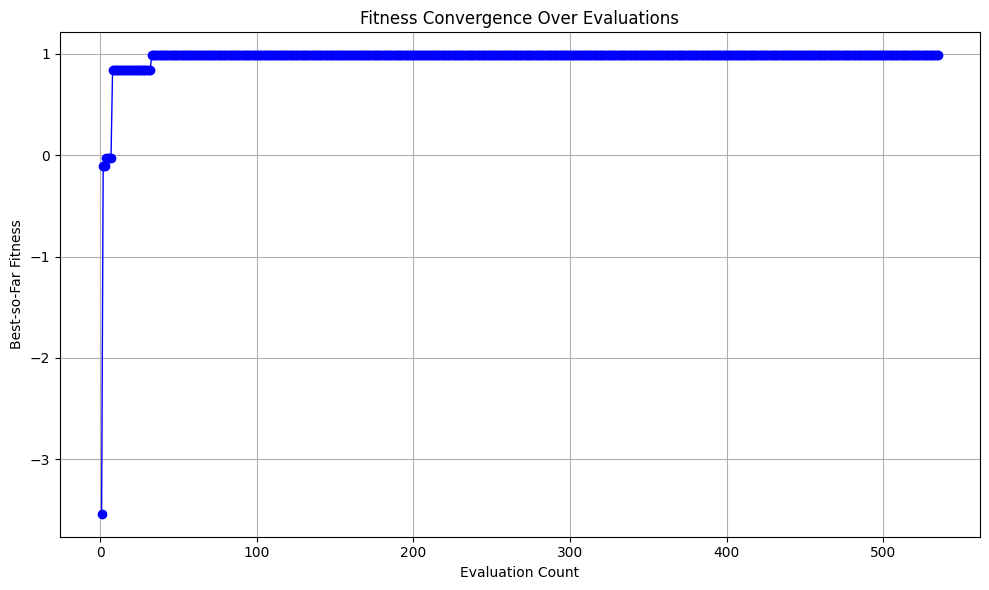

n1 = ceil(x0)
n2 = abs(n1)
n3 = squared(n1)
n4 = squared(x0)
n5 = max(n4, x0)
n6 = mult(n1, x0)
n7 = aminus(n2, n3)
n8 = gt(n7, x0)
n9 = sqrt(n4)
n10 = ceil(n5)
n11 = floor(n1)
n12 = squared(x0)
n13 = min(n11, x0)
n14 = mult(n12, n1)
n15 = floor(n13)
n16 = min(n14, n11)
n17 = aminus(n3, x0)
n18 = pow(n12, x0)
n19 = exp(n3, n6)
n20 = sqrtxy(x0, n7)
n21 = inv(n17)
n22 = floor(x0)
n23 = gt(x0, n11)
n24 = gt(n15, x0)
n25 = squared(n24)
n26 = mult(x0, n6)
n27 = pow(n8, n20)
n28 = sqrt(n20)
n29 = sum(x0, n8)
n30 = inv(n8)
Output: n13

Unrolled output expression:
min(floor(ceil(x0)), x0)


In [6]:
#Initialise the ES and run the evolution
ES_cgp = ES(evaluator1, mu=1, lam=4,genome_factory=lambda: CGPGenome.create_genome(CGP_config),mutation = mutationcgp_golden)
best_genome = ES_cgp.evolve(n_generations=10000, early_stopping=100)

print(best_genome.to_function_string())

#SR bench pour exemple de datasets pour symbolic regression
#add a visual graph that show the nodes
#convergency of fitness function per evaluation
#graphviz see previous pycgp code
#For presentation focus on the application of CGP (feature selection)
# mardi , paul sabatier

n1 = ceil(x0)
n2 = abs(n1)
n3 = squared(n1)
n4 = squared(x0)
n5 = max(n4, x0)
n6 = mult(n1, x0)
n7 = aminus(n2, n3)
n8 = gt(n7, x0)
n9 = sqrt(n4)
n10 = ceil(n5)
n11 = floor(n1)
n12 = squared(x0)
n13 = min(n11, x0)
n14 = mult(n12, n1)
n15 = floor(n13)
n16 = min(n14, n11)
n17 = aminus(n3, x0)
n18 = pow(n12, x0)
n19 = exp(n3, n6)
n20 = sqrtxy(x0, n7)
n21 = inv(n17)
n22 = floor(x0)
n23 = gt(x0, n11)
n24 = gt(n15, x0)
n25 = squared(n24)
n26 = mult(x0, n6)
n27 = pow(n8, n20)
n28 = sqrt(n20)
n29 = sum(x0, n8)
n30 = inv(n8)
Output: n13

Unrolled output expression:
min(floor(ceil(x0)), x0)


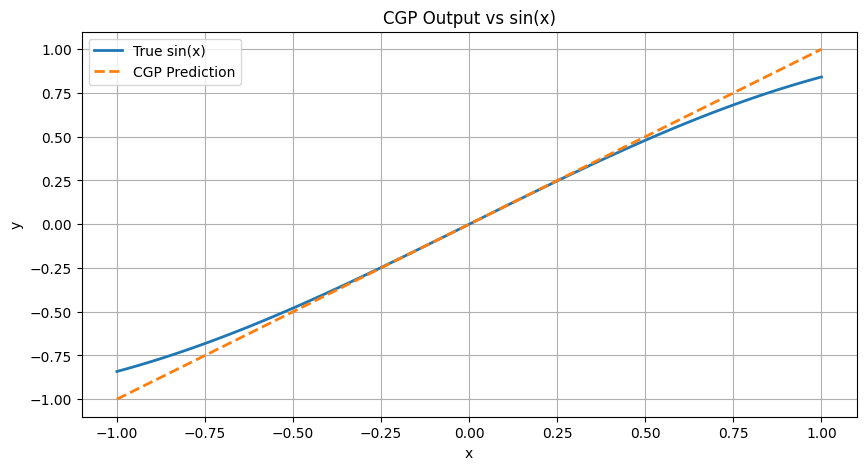

Fitness of best genome: 0.985955675414213


In [7]:
#See if the output fit the sin function

import matplotlib.pyplot as plt

def plot_sin_vs_prediction(evaluator, genome):
    inputs = evaluator.inputs
    targets = evaluator.targets

    predictions = [genome.get_value([x])[0] for x in inputs]

    plt.figure(figsize=(10, 5))
    plt.plot(inputs, targets, label='True sin(x)', linewidth=2)
    plt.plot(inputs, predictions, label='CGP Prediction', linestyle='--', linewidth=2)
    plt.title('CGP Output vs sin(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
print(best_genome.to_function_string())
plot_sin_vs_prediction(evaluator1, best_genome)
print(f"Fitness of best genome: {evaluator1.evaluate(best_genome, generation=0)}")


              in1         in2         in3         in4      target
count  488.000000  488.000000  488.000000  488.000000  488.000000
mean     5.506148    5.084016    5.344262    5.610656    5.229508
std      1.525944    1.551018    1.135722    0.937497    1.421668
min      0.000000    0.000000    2.000000    2.000000    1.000000
25%      4.750000    4.000000    5.000000    5.000000    4.000000
50%      6.000000    5.000000    5.000000    6.000000    5.000000
75%      6.000000    6.000000    6.000000    6.000000    6.000000
max      9.000000    9.000000    8.000000    8.000000    9.000000
[[6. 5. 6. 6.]
 [5. 4. 5. 5.]
 [5. 3. 4. 5.]
 ...
 [4. 4. 6. 8.]
 [8. 6. 6. 7.]
 [7. 6. 5. 5.]]
[6. 5. 4. 6. 3. 6. 4. 2. 5. 6. 6. 6. 3. 5. 5. 4. 5. 6. 4. 7. 6. 2. 5. 6.
 7. 7. 2. 5. 6. 6. 6. 4. 3. 5. 6. 4. 5. 6. 4. 4. 5. 4. 5. 7. 7. 2. 5. 3.
 4. 5. 4. 5. 7. 6. 6. 5. 5. 7. 6. 6. 3. 6. 4. 6. 5. 8. 6. 6. 6. 6. 5. 4.
 6. 6. 5. 4. 6. 5. 4. 5. 7. 6. 7. 6. 7. 8. 3. 5. 7. 7. 6. 6. 6. 7. 5. 7.
 4. 6. 4. 6. 6. 7.

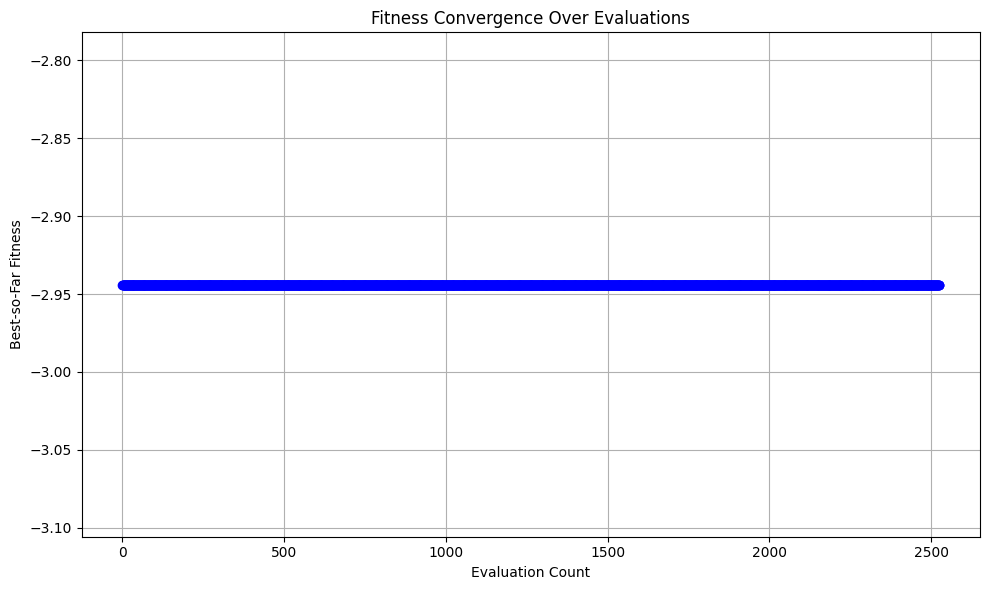

In [ ]:
##WORK IN PROGRESS

from pmlb import fetch_data
from sklearn.preprocessing import MinMaxScaler

# Returns NumPy arrays
gametes = fetch_data('1027_ESL')
X, y = fetch_data('1027_ESL', return_X_y=True, local_cache_dir='./datasets')

print(gametes.describe())
# Conversion des colonnes en float
X = X.astype(float)
y = y.astype(float)

print(X)
print(y)

# Standardisation avec MinMaxScaler dans l'intervalle [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

evaluator2 = Regressor(X, y)

#Initialise config + Evaluator + mutation 
CGP_config = CGPConfig(num_inputs=X.shape[1], num_nodes=30, num_outputs=1, input_node_chance=0.4, const_min=-1, const_max=1, function_set=functions)
#For evaluatorsin num_inputs = 1

#mutationcgp_proba = Proba_Mutation(CGP_config, number_mutations=10, input_node_mutation_rate=0.2, output_node_mutation_rate=0.1, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1)
mutationcgp_golden = Golden_mutation(CGP_config,input_node_mutation_rate=0.2, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1,output_node_mutation_rate=0.1)
ES_cgp = ES(evaluator2, mu=5, lam=20,genome_factory=lambda: CGPGenome.create_genome(CGP_config),mutation = mutationcgp_golden)
best_genome = ES_cgp.evolve(n_generations=10000, early_stopping=100, verbose=True)

